# _In this notebook we will try to visualize what the CNN means by when fed by the output class using Keras._ 

#### _But How?_
#### __First we'll feed noisy image to CNN. Then compute loss = output_of_noisy_image - output_of_class(which is one hot vector)__
#### _We'll compute gradient of loss w.r.t. input noisy image_
#### __We'll do gradient DESCENT as we have to minimize the loss so we will do input_image = input_image - gradient*step__

In [1]:
from keras import applications

model = applications.VGG16(include_top=True, weights='imagenet')
# include_top = False will provide us VGG16 model without last 3 fully connected layers. 
# The benefit of that is that it will enable us to feed any size of image to the model.

model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [2]:
from keras import backend as K
from keras import losses
import numpy as np
 
class_no_to_be_visualized = 340
# 340 means : zebra

input_img = model.input
layer_name = 'predictions'
predict_output = model.get_layer(layer_name).output

desired_output = np.zeros(shape=(1, 1000), dtype=np.float32)
desired_output[0][class_no_to_be_visualized] = 1

#loss_fxn = K.mean(K.square(desired_output - predict_output))

loss_fxn = losses.hinge(y_pred=predict_output, y_true=desired_output)

gradient = K.gradients(loss_fxn, input_img)[0]

gradient = gradient / (K.sqrt(K.mean(K.square(gradient))) + 1e-05)

iterate = K.function([input_img], [loss_fxn, gradient])

In [3]:
import numpy as np
import time

initial_time = time.time()

w = 224
h = 224
# w and h needs to be exact same as input shape requirements of VGG16 as we are having Fully connected layers in the model.

input_img_data = np.random.random((1, w, h, 3))*20 + 128
before = input_img_data
step_size = 1000
# as the gradient is very small, in the scale of 10^-5

steps = 10000
for i in range(steps):
    loss, grads = iterate([input_img_data])
    if (i+1) % 100 == 0:
        print("Step: {}/{}".format(i+1, steps), "Loss: ", loss, "Max G: ", np.amax(grads), "Min G: ", np.amin(grads))
        hundred_time = time.time()
        diff = hundred_time - initial_time
        req_time = int(((steps-i)*diff) / i)
        print("Remaining time: ", req_time / 60, "mins")
    input_img_data = input_img_data - grads*step_size

Step: 100/10000 Loss:  [0.99900013] Max G:  1.1058183e-05 Min G:  -1.3996773e-05
Remaining time:  31.716666666666665 mins
Step: 200/10000 Loss:  [0.9990001] Max G:  4.8875954e-06 Min G:  -4.953106e-06
Remaining time:  27.566666666666666 mins
Step: 300/10000 Loss:  [0.999] Max G:  3.428906e-06 Min G:  -3.21947e-06
Remaining time:  26.316666666666666 mins
Step: 400/10000 Loss:  [0.999] Max G:  2.3313328e-06 Min G:  -2.3743737e-06
Remaining time:  25.433333333333334 mins
Step: 500/10000 Loss:  [0.999] Max G:  1.880595e-06 Min G:  -1.780187e-06
Remaining time:  24.783333333333335 mins
Step: 600/10000 Loss:  [0.999] Max G:  1.5709929e-06 Min G:  -1.4310202e-06
Remaining time:  24.3 mins
Step: 700/10000 Loss:  [0.999] Max G:  1.3396527e-06 Min G:  -1.2981508e-06
Remaining time:  23.9 mins
Step: 800/10000 Loss:  [0.999] Max G:  1.114412e-06 Min G:  -1.0777262e-06
Remaining time:  23.55 mins
Step: 900/10000 Loss:  [0.999] Max G:  9.81706e-07 Min G:  -9.657413e-07
Remaining time:  23.2333333333

Step: 7500/10000 Loss:  [0.999] Max G:  1.2911065e-07 Min G:  -1.431181e-07
Remaining time:  6.45 mins
Step: 7600/10000 Loss:  [0.999] Max G:  1.3501821e-07 Min G:  -1.469519e-07
Remaining time:  6.2 mins
Step: 7700/10000 Loss:  [0.999] Max G:  1.3029305e-07 Min G:  -1.466484e-07
Remaining time:  5.933333333333334 mins
Step: 7800/10000 Loss:  [0.999] Max G:  1.2755683e-07 Min G:  -1.3690031e-07
Remaining time:  5.683333333333334 mins
Step: 7900/10000 Loss:  [0.999] Max G:  1.2391214e-07 Min G:  -1.3132225e-07
Remaining time:  5.433333333333334 mins
Step: 8000/10000 Loss:  [0.999] Max G:  1.3586482e-07 Min G:  -1.3131621e-07
Remaining time:  5.166666666666667 mins
Step: 8100/10000 Loss:  [0.999] Max G:  1.326873e-07 Min G:  -1.2863379e-07
Remaining time:  4.916666666666667 mins
Step: 8200/10000 Loss:  [0.999] Max G:  1.2696223e-07 Min G:  -1.2344974e-07
Remaining time:  4.65 mins
Step: 8300/10000 Loss:  [0.999] Max G:  1.271453e-07 Min G:  -1.3096219e-07
Remaining time:  4.4 mins
Step: 

#### _Post process the output._ 

In [4]:
from scipy.misc import imsave

# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

# input_img_data will be having 1, 224, 224, 3 shape so we'll use its first element to obtain the np array having 224, 224, 3 shape
img = input_img_data[0]
img = deprocess_image(img)

#### _Now, let's plot the images - Original (before) and Output(Processed)_ 

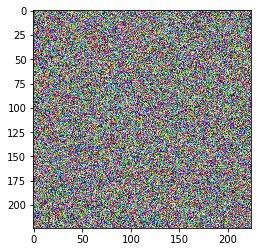

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
# Noise image - Before 
plt.imshow(np.squeeze(before))

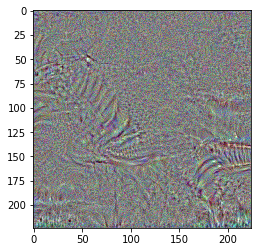

In [6]:
# Noise image - After
plt.imshow(img)

#### _Now, that we have the generated image, let's test it to get the model's prediction just to cross check what we have got._

In [7]:
X = np.expand_dims(img, 0)
output = model.predict(x=X)

print("Predicted Class no: ", np.argmax(output))

Predicted Class no:  340


### _As we can see, the image that we get after optimizing the original noise is shown above. When that image has been fed to the model it has generated the same class with which we have started. But by looking at the generated image we are far away from visualizing it as a ZEBRA for class no. 340._ 

### _So it was an failed attempt to visualize what CNN interprete as an output value._